In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
df_event = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅리더/미니프로젝트/머신러닝 과제 올림픽/athlete_events.csv')
df_noc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅리더/미니프로젝트/머신러닝 과제 올림픽/noc_regions.csv')

In [3]:
df_event

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df_noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [6]:
df_event["NOC"].value_counts()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: NOC, Length: 230, dtype: int64

In [7]:
df_event.corr()

<ipython-input-7-32b7ccedc4e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_event.corr()


,ID,Age,Height,Weight,Year
ID,1.000000,-0.003631,-0.011141,-0.009176,0.011885
Age,-0.003631,1.000000,0.138246,0.212069,-0.115137
Height,-0.011141,0.138246,1.000000,0.796213,0.047578
Weight,-0.009176,0.212069,0.796213,1.000000,0.019095
Year,0.011885,-0.115137,0.047578,0.019095,1.000000


In [8]:
df_event.describe(include=['O'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


In [9]:
#sns.histplot(data = df_event)

In [10]:
c = df_event['Year'] >= 2000
df = df_event[c]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85258 entries, 1 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      85258 non-null  int64  
 1   Name    85258 non-null  object 
 2   Sex     85258 non-null  object 
 3   Age     85255 non-null  float64
 4   Height  84547 non-null  float64
 5   Weight  84048 non-null  float64
 6   Team    85258 non-null  object 
 7   NOC     85258 non-null  object 
 8   Games   85258 non-null  object 
 9   Year    85258 non-null  int64  
 10  Season  85258 non-null  object 
 11  City    85258 non-null  object 
 12  Sport   85258 non-null  object 
 13  Event   85258 non-null  object 
 14  Medal   12138 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 10.4+ MB


# winter와 Summer을 나누지 않고 그대로 나둠

## 계절 자르는 코드

In [12]:
# df_winter = df[df['Season'] == 'Winter']
# df_winter.info()

In [13]:
# df_Summer = df[df['Season'] == 'Summer']
# df_Summer.info()

In [14]:
# df_Summer.info()

## 엑셀로 저장하기

In [15]:
adress = "/content/drive/MyDrive/Colab Notebooks/빅리더/미니프로젝트/머신러닝 과제 올림픽"
#df.to_excel(excel_writer=adress+'Olympic_Since2000.xlsx')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85258 entries, 1 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      85258 non-null  int64  
 1   Name    85258 non-null  object 
 2   Sex     85258 non-null  object 
 3   Age     85255 non-null  float64
 4   Height  84547 non-null  float64
 5   Weight  84048 non-null  float64
 6   Team    85258 non-null  object 
 7   NOC     85258 non-null  object 
 8   Games   85258 non-null  object 
 9   Year    85258 non-null  int64  
 10  Season  85258 non-null  object 
 11  City    85258 non-null  object 
 12  Sport   85258 non-null  object 
 13  Event   85258 non-null  object 
 14  Medal   12138 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 10.4+ MB


In [17]:
df.isnull().sum()

ID            0
Name          0
Sex           0
Age           3
Height      711
Weight     1210
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     73120
dtype: int64

In [18]:
df['Medal'].head(100)

1         NaN
28        NaN
31        NaN
33        NaN
40     Bronze
        ...  
278    Bronze
281       NaN
282       NaN
285       NaN
286    Silver
Name: Medal, Length: 100, dtype: object

In [19]:
# df_Summer[df_Summer['Medal'].isin(['Gold', 'Silver', 'Bronze'])]['Medal'] == 1
df.replace({'Medal':'Gold'},1,inplace=True)
df.replace({'Medal':'Silver'},1,inplace=True)
df.replace({'Medal':'Bronze'},1,inplace=True)

<ipython-input-19-b515a7cee4b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Medal':'Gold'},1,inplace=True)
<ipython-input-19-b515a7cee4b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Medal':'Silver'},1,inplace=True)
<ipython-input-19-b515a7cee4b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [20]:
df["Medal"].fillna(0,inplace = True)
df

<ipython-input-20-8265b30b1570>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Medal"].fillna(0,inplace = True)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0.0
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,0.0
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,0.0
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,0.0
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,0.0
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,0.0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0.0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0.0


In [21]:
df.drop(['Games','Name','Team','City','ID','Event'],axis = 1, inplace =True)

<ipython-input-21-1f6fe08ec1cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Games','Name','Team','City','ID','Event'],axis = 1, inplace =True)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85258 entries, 1 to 271115
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     85258 non-null  object 
 1   Age     85255 non-null  float64
 2   Height  84547 non-null  float64
 3   Weight  84048 non-null  float64
 4   NOC     85258 non-null  object 
 5   Year    85258 non-null  int64  
 6   Season  85258 non-null  object 
 7   Sport   85258 non-null  object 
 8   Medal   85258 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 6.5+ MB


In [23]:
df.replace({'Season':'Winter'},0,inplace=True)
df.replace({'Season':'Summer'},1,inplace=True)
df.replace({'Sex':'M'},1,inplace=True)
df.replace({'Sex':'F'},0,inplace=True)
df.info()

<ipython-input-23-9697a6028702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Season':'Winter'},0,inplace=True)
<ipython-input-23-9697a6028702>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Season':'Summer'},1,inplace=True)
<ipython-input-23-9697a6028702>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85258 entries, 1 to 271115
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     85258 non-null  int64  
 1   Age     85255 non-null  float64
 2   Height  84547 non-null  float64
 3   Weight  84048 non-null  float64
 4   NOC     85258 non-null  object 
 5   Year    85258 non-null  int64  
 6   Season  85258 non-null  int64  
 7   Sport   85258 non-null  object 
 8   Medal   85258 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 6.5+ MB


In [24]:
df.head(100)

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
1,1,23.0,170.0,60.0,CHN,2012,1,Judo,0.0
28,1,26.0,186.0,96.0,FIN,2002,0,Ice Hockey,0.0
31,1,31.0,172.0,70.0,FIN,2000,1,Badminton,0.0
33,0,34.0,159.0,55.5,FIN,2000,1,Sailing,0.0
40,1,28.0,184.0,85.0,FIN,2014,0,Ice Hockey,1.0
...,...,...,...,...,...,...,...,...,...
278,1,28.0,175.0,70.0,USA,2014,0,Figure Skating,1.0
281,0,21.0,164.0,63.0,CAN,2008,1,Sailing,0.0
282,0,30.0,163.0,52.0,USA,2016,1,Cycling,0.0
285,1,34.0,185.0,91.0,CAN,2000,1,Sailing,0.0


In [25]:
df['Medal'].value_counts(dropna=False, normalize=True)

0.0    0.857632
1.0    0.142368
Name: Medal, dtype: float64

### 비대칭 데이터 문제(imbalanced data problem)
다수 클래스 데이터에서 일부만 사용하는**언더 샘플링**이나 <br>
소수 클래스 데이터를 증가시키는 **오버 샘플링**을 사용하여 <br>
데이터 비율을 맞추면 정밀도(precision)가 향상됨

In [26]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 994.9 kB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [27]:
from imblearn.under_sampling import RandomUnderSampler

# 데이터프레임에서 X와 y 추출
X = df.drop('Medal', axis=1)  # 'Medal' 열을 제외한 나머지 열을 X로 설정
y = df['Medal']  # 'Medal' 열을 y로 설정

# 언더샘플링 객체 생성
rus = RandomUnderSampler(sampling_strategy=0.35, random_state=42)  # 60%의 0 값을 유지하기 위해 샘플링 비율을 설정

# 언더샘플링 수행
X_resampled, y_resampled = rus.fit_resample(X, y)

# 언더샘플링 결과 확인
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
print(resampled_df['Medal'].value_counts())

0.0    34680
1.0    12138
Name: Medal, dtype: int64


In [28]:
resampled_df['Medal'].value_counts(dropna=False, normalize=True)

0.0    0.740741
1.0    0.259259
Name: Medal, dtype: float64

In [29]:
#아프리카 : 0 , 아메리카 1, 아시아 2, 유럽 3, 오세아니아 4 etc 5
continents = {
    0 : ['ALG', 'ANG', 'BEN', 'BOT', 'BFA', 'BDI', 'CMR', 'CPV', 'CAF', 'COM', 'COG', 'CIV', 'DJI', 'EGY', 'GNQ',
              'ERI', 'SWZ', 'ETH', 'GAB', 'GMB', 'GHA', 'GIN', 'CIV', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 'MLI',
              'MRT', 'MUS', 'MYT', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 'CAF', 'COD', 'RWA', 'STP', 'SEN', 'SYC', 'SLE',
              'SOM', 'ZAF', 'SSD', 'SDN', 'SWZ', 'TZA', 'TGO', 'TUN', 'UGA', 'ZMB', 'ZWE'],
    1 : ['ANT', 'ARG', 'ARU', 'BAH', 'BAR', 'BLZ', 'BER', 'BOL', 'BRA', 'IVB', 'CAN', 'CAY', 'CHI', 'COL', 'CRI',
              'CUB', 'DMA', 'DOM', 'ECU', 'SLV', 'GRD', 'GRL', 'GLP', 'GUM', 'GUY', 'HTI', 'HND', 'JAM', 'MEX', 'MSR',
              'NIC', 'PAN', 'PAR', 'PER', 'PRI', 'KNA', 'LCA', 'VCT', 'SUR', 'TTO', 'USA', 'URY', 'VEN', 'VGB', 'VIR', 'CUW', 'MAT' ],
    2 : ['AFG', 'BGD', 'BTN', 'BRN', 'KHM', 'CHN', 'HKG', 'IND', 'IDN', 'IRN', 'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ',
             'KWT', 'KGZ', 'LAO', 'LBN', 'MYS', 'MDV', 'MNG', 'MMR', 'NPL', 'PRK', 'OMN', 'PAK', 'PHL', 'QAT', 'SAU',
             'SGP', 'KOR', 'LKA', 'SYR', 'TJK', 'THA', 'TWN', 'TUR', 'TKM', 'ARE', 'UZB', 'VNM',
            'YEM','TCA', 'TCA'],
    3 : ['ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN',
            'FRA', 'GEO', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'KOS', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA',
            'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE',
            'CHE', 'UKR', 'GBR', 'VAT', 'AIA', 'ENG', 'GIB', 'NIR', 'SCO','WAL'],
    4 : ['AUS', 'COK', 'FSM', 'FJI', 'KIR', 'MHL', 'NRU', 'NZL', 'PLW', 'PNG',
              'WSM', 'SLB', 'TON', 'TUV', 'VUT','CAL', 'FRP', 'NIS', 'NMI','TAH']}

In [30]:
def map_continent(noc):
    for continent, countries in continents.items():
        if noc in countries:
            return continent
    return 5

# NOC 열의 값을 대륙으로 변경
resampled_df['NOC'] = resampled_df['NOC'].apply(map_continent)

In [31]:
resampled_df

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
64269,0,22.0,196.0,92.0,1,2004,1,Basketball,0.0
100376,0,17.0,167.0,62.0,3,2006,0,Alpine Skiing,0.0
59807,1,26.0,190.0,80.0,1,2000,1,Athletics,0.0
248023,1,33.0,195.0,125.0,3,2000,1,Judo,0.0
185312,0,36.0,161.0,69.0,3,2012,1,Weightlifting,0.0
...,...,...,...,...,...,...,...,...,...
271009,0,28.0,167.0,60.0,5,2004,1,Hockey,1.0
271013,1,23.0,189.0,80.0,5,2004,1,Swimming,1.0
271019,1,29.0,175.0,64.0,5,2016,1,Hockey,1.0
271102,0,19.0,171.0,64.0,3,2000,1,Athletics,1.0


In [32]:
# resampled_df["NOC"].isnull().sum()

In [33]:
resampled_df[resampled_df["NOC"]==5].value_counts()

Sex  Age   Height  Weight  NOC  Year  Season  Sport       Medal
1    21.0  172.0   67.0    5    2008  1       Gymnastics  0.0      6
     27.0  171.0   65.0    5    2004  1       Gymnastics  0.0      5
     22.0  177.0   72.0    5    2016  1       Gymnastics  0.0      5
     25.0  172.0   67.0    5    2012  1       Gymnastics  0.0      5
0    25.0  165.0   55.0    5    2008  1       Gymnastics  0.0      5
                                                                  ..
     32.0  176.0   78.0    5    2012  1       Judo        0.0      1
                   74.0    5    2004  1       Athletics   0.0      1
                   65.0    5    2008  1       Athletics   0.0      1
                   64.0    5    2016  1       Swimming    0.0      1
1    61.0  178.0   89.0    5    2008  1       Shooting    0.0      1
Length: 7949, dtype: int64

In [34]:
#adress = "/content/drive/MyDrive/Colab Notebooks/빅리더/미니프로젝트/머신러닝 과제 올림픽"
#resampled_df.to_excel(excel_writer=adress+'Olympic_Scaled_NOC수정.xlsx')

In [35]:
resampled_df.corr()

<ipython-input-35-1b917c4a6ed3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  resampled_df.corr()


,Sex,Age,Height,Weight,NOC,Year,Season,Medal
Sex,1.000000,0.120122,0.538772,0.547115,0.026665,-0.036295,-0.018256,-0.034336
Age,0.120122,1.000000,0.136094,0.180203,0.040412,0.034067,-0.021988,0.039831
Height,0.538772,0.136094,1.000000,0.795086,0.083801,0.005744,0.056906,0.091619
Weight,0.547115,0.180203,0.795086,1.000000,0.061503,-0.002800,0.016618,0.087690
NOC,0.026665,0.040412,0.083801,0.061503,1.000000,-0.030195,-0.041583,-0.040762
Year,-0.036295,0.034067,0.005744,-0.002800,-0.030195,1.000000,-0.024324,0.005060
Season,-0.018256,-0.021988,0.056906,0.016618,-0.041583,-0.024324,1.000000,0.042901
Medal,-0.034336,0.039831,0.091619,0.087690,-0.040762,0.005060,0.042901,1.000000


In [36]:
resampled_df.isnull().sum()

Sex         0
Age         1
Height    333
Weight    599
NOC         0
Year        0
Season      0
Sport       0
Medal       0
dtype: int64

In [37]:
resampled_df.dtypes

Sex         int64
Age       float64
Height    float64
Weight    float64
NOC         int64
Year        int64
Season      int64
Sport      object
Medal     float64
dtype: object

In [38]:
#설상1 빙상2 투기3 수상4 구기5 체조6 기타7 슬라이딩8 육상9 라켓10
sport = {1 : ['Alpine Skiing', 'Cross Country Skiing', 'Freestyle Skiing', 'Ice Hockey', 'Nordic Combined', 'Ski Junmping', 'Snowbording'],
                                               2 : ['Curling', 'Figure Skating', 'Short Track Speed Skating', 'Speed Skating'],
                                               3 : ['Boxing', 'Judo', 'Taekwondo', 'Wrestling'],
                                               4 : ['Canoeing', 'Diving', 'Football', 'Rowing', 'Sailing', 'Swimming', 'Synchronized Swimming', 'Water Polo'],
                                               5 : ['Baseball', 'Basketball', 'Beach Volleyball', 'Golf', 'Handball', 'Hockey', 'Rugby Sevens', 'Softbal', 'Volleyball'],
                                               6 : ['Gymnastics', 'Rhythmic Gymnastics', 'Tramplining'],
                                               7 : ['Archery', 'Cycling', 'Equestrianism', 'Fencing', 'Modern Pentathlon', 'Shooting', 'Triathlon', 'Weightlifting'],
                                               8 : ['Biathlon', 'Biathlon', 'Luge', 'Skeleton'],
                                               9 : ['Athletics'],
                                               10 : ['Badminton', 'Table Tennis', 'Tennis']}

In [39]:
def sport_continent(Sport):
    for game, event in sport.items():
        if Sport in event:
            return game
    return 11

# NOC 열의 값을 종목으로 변경
resampled_df['Sport'] = resampled_df['Sport'].apply(sport_continent)

In [40]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46818 entries, 64269 to 271103
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     46818 non-null  int64  
 1   Age     46817 non-null  float64
 2   Height  46485 non-null  float64
 3   Weight  46219 non-null  float64
 4   NOC     46818 non-null  int64  
 5   Year    46818 non-null  int64  
 6   Season  46818 non-null  int64  
 7   Sport   46818 non-null  int64  
 8   Medal   46818 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 3.6 MB


In [41]:
resampled_df.astype(float)

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
64269,0.0,22.0,196.0,92.0,1.0,2004.0,1.0,5.0,0.0
100376,0.0,17.0,167.0,62.0,3.0,2006.0,0.0,1.0,0.0
59807,1.0,26.0,190.0,80.0,1.0,2000.0,1.0,9.0,0.0
248023,1.0,33.0,195.0,125.0,3.0,2000.0,1.0,3.0,0.0
185312,0.0,36.0,161.0,69.0,3.0,2012.0,1.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...
271009,0.0,28.0,167.0,60.0,5.0,2004.0,1.0,5.0,1.0
271013,1.0,23.0,189.0,80.0,5.0,2004.0,1.0,4.0,1.0
271019,1.0,29.0,175.0,64.0,5.0,2016.0,1.0,5.0,1.0
271102,0.0,19.0,171.0,64.0,3.0,2000.0,1.0,9.0,1.0


In [42]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46818 entries, 64269 to 271103
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     46818 non-null  int64  
 1   Age     46817 non-null  float64
 2   Height  46485 non-null  float64
 3   Weight  46219 non-null  float64
 4   NOC     46818 non-null  int64  
 5   Year    46818 non-null  int64  
 6   Season  46818 non-null  int64  
 7   Sport   46818 non-null  int64  
 8   Medal   46818 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 3.6 MB


In [43]:
df = resampled_df.fillna(resampled_df.Weight.median())

In [44]:
df = resampled_df.fillna(resampled_df.Height.median())

In [45]:
df.isnull().sum()

Sex       0
Age       0
Height    0
Weight    0
NOC       0
Year      0
Season    0
Sport     0
Medal     0
dtype: int64

In [46]:
df.corr()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
Sex,1.000000,0.118469,0.536961,0.432769,0.026665,-0.036295,-0.018256,-0.029121,-0.034336
Age,0.118469,1.000000,0.132712,0.108471,0.039742,0.033791,-0.021513,0.103868,0.039162
Height,0.536961,0.132712,1.000000,0.613561,0.083177,0.005711,0.056779,-0.053749,0.091472
Weight,0.432769,0.108471,0.613561,1.000000,0.035536,0.033077,0.003395,-0.076521,0.052094
NOC,0.026665,0.039742,0.083177,0.035536,1.000000,-0.030195,-0.041583,-0.010948,-0.040762
Year,-0.036295,0.033791,0.005711,0.033077,-0.030195,1.000000,-0.024324,-0.008761,0.005060
Season,-0.018256,-0.021513,0.056779,0.003395,-0.041583,-0.024324,1.000000,0.316167,0.042901
Sport,-0.029121,0.103868,-0.053749,-0.076521,-0.010948,-0.008761,0.316167,1.000000,-0.083292
Medal,-0.034336,0.039162,0.091472,0.052094,-0.040762,0.005060,0.042901,-0.083292,1.000000


# T test T-검정

In [47]:
from scipy import stats

In [48]:
data_1 = df[df['Medal'] == 1]['Age']
data_0 = df[df['Medal'] == 0]['Age']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05

Ttest_indResult(statistic=8.480010617238129, pvalue=2.3164805995341824e-17)

In [49]:
data_1 = df[df['Medal'] == 1]['Sex']
data_0 = df[df['Medal'] == 0]['Sex']

stats.ttest_ind(data_1, data_0)

Ttest_indResult(statistic=-7.433564791971401, pvalue=1.075086622928302e-13)

In [50]:
data_1 = df[df['Medal'] == 1]['Height']
data_0 = df[df['Medal'] == 0]['Height']

stats.ttest_ind(data_1, data_0)

Ttest_indResult(statistic=19.875209285399077, pvalue=1.5341429776543333e-87)

In [51]:
data_1 = df[df['Medal'] == 1]['Weight']
data_0 = df[df['Medal'] == 0]['Weight']

stats.ttest_ind(data_1, data_0)

Ttest_indResult(statistic=11.286840159547223, pvalue=1.6641545930633094e-29)

In [52]:
data_1 = df[df['Medal'] == 1]['NOC']
data_0 = df[df['Medal'] == 0]['NOC']

stats.ttest_ind(data_1, data_0)

Ttest_indResult(statistic=-8.826987704738698, pvalue=1.1116367025542015e-18)

In [53]:
data_1 = df[df['Medal'] == 1]['Year']
data_0 = df[df['Medal'] == 0]['Year']

stats.ttest_ind(data_1, data_0)

Ttest_indResult(statistic=1.0948509897953258, pvalue=0.2735875560680339)

In [54]:
data_1 = df[df['Medal'] == 1]['Season']
data_0 = df[df['Medal'] == 0]['Season']

stats.ttest_ind(data_1, data_0)

Ttest_indResult(statistic=9.291043250516076, pvalue=1.5912356079966422e-20)

In [55]:
data_1 = df[df['Medal'] == 1]['Sport']
data_0 = df[df['Medal'] == 0]['Sport']

stats.ttest_ind(data_1, data_0)

Ttest_indResult(statistic=-18.084713264585783, pvalue=7.451582610769242e-73)

# 데이터분할

In [56]:
data = df.drop(['Medal'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = df['Medal']                # 타겟변수만 target에 저장

In [57]:
# 50:50 비율로 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42, stratify = target)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (23409, 8)
X_test shape: (23409, 8)


# 결정트리 (Decision Tree) 분류 모델

In [58]:
# Decision Tree 모델 (Default인 GINI기준이자 Maximal depth 조건)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(random_state=0)   # Classifier로 DecisionTreeClassifer 지정
model = tree.fit(X_train, y_train)   # Clssifier를 트레이닝 데이터셋에서 학습시킴
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print("Accuracy(GINI) on training set:{:.5f}".format(model.score(X_train, y_train)))
print("Accuracy(GINI) on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy(GINI) on training set:0.97762
Accuracy(GINI) on test set:0.68674


# 로지스틱 회귀(Logistic Regression) 분류모델

In [59]:
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Logreg Training set score:0.74142
Logreg Test set score:0.74142


In [60]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)

# 그리드 서치
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridSearchCV max accuracy:0.74078
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


# Random Forest 렌덤포레스트 분류모델

In [61]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=0)
model = rf.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
#accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Random Forest Accuracy on training set:0.97762
Random Forest Accuracy on test set:0.74847


In [62]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
rf = RandomForestClassifier(n_estimators = 100, random_state=0)

In [63]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'max_depth': range(10, 41), 'n_estimators': [100, 200]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=cross_validation,
                       verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameter:", (grid_rf.best_params_))

Fitting 5 folds for each of 62 candidates, totalling 310 fits
GridSearchCV max accuracy:0.75556
GridSearchCV best parameter: {'max_depth': 14, 'n_estimators': 100}


In [64]:
best_clf = grid_rf.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.75565
ROC AUC on test set:0.72223


# Gradient Boosting 그레디언트 부스트 모델

In [65]:
'''
# Gradient Boosting 모델 (Default 모델)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gr = GradientBoostingClassifier(random_state = 0)
model = gr.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("grbt Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("grbt Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))
'''

'\n# Gradient Boosting 모델 (Default 모델)\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.metrics import accuracy_score\ngr = GradientBoostingClassifier(random_state = 0)\nmodel = gr.fit(X_train, y_train)\npred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성\naccuracy = accuracy_score(y_test, pred)\n\nprint ("grbt Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))\nprint ("grbt Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))\n'

In [66]:
'''
# 그리드 서치 추가 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Gradient Boosting 모델 (Default 모델)
gr = GradientBoostingClassifier(random_state = 0)

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'max_depth': range(11, 16), 'n_estimators':[100,200],
          'learning_rate':[0.01, 0.1, 1]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_gr = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1)
grid_gr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_))
'''

'\n# 그리드 서치 추가 실행\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.model_selection import StratifiedKFold\n\n# Gradient Boosting 모델 (Default 모델)\ngr = GradientBoostingClassifier(random_state = 0)\n\n# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정\ncross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)\nparams = {\'max_depth\': range(11, 16), \'n_estimators\':[100,200],\n          \'learning_rate\':[0.01, 0.1, 1]}\n\n# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서\n# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장\ngrid_gr = GridSearchCV(model, param_grid=params, scoring=\'accuracy\', cv=cross_validation,\n                       n_jobs=-1)\ngrid_gr.fit(X_train, y_train)\n\nprint("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))\nprint("GridSearchCV best parameter:", (grid_gr.best_params_))\n'

# XG Boost 분류모델


In [67]:
pip install xgboost

In [68]:
pip install lightgbm

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor

df.shape

(46818, 9)

In [70]:
# 기본 XGBRegressor 모델
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print('r2: {0:.5f}'.format(accuracy_score(y_test, pred)))

r2: 0.75151


#

In [75]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

parameters = {'colsample_bytree': [0.7],
              'learning_rate': [0.05],
              'max_depth': [16],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.8, 0.9]
              }

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [16], 'min_child_weight': [4],
                         'n_estimators': [1000], 'subsample': [0.8, 0.9]},
             scoring='r2', verbose=True)

In [72]:
print('GridSearchCV 최적 파라미터:', xgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 16, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.9}


In [76]:
model = xgb_grid.best_estimator_
pred = model.predict(X_test)

print('accuracy_score: {0:.5f}'.format(accuracy_score(y_test, pred)))

accuracy_score: 0.73459


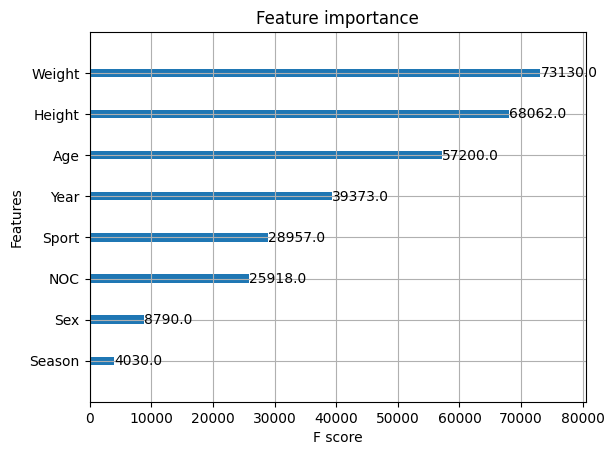

In [77]:
from xgboost import plot_importance

plot_importance(model, max_num_features=10);

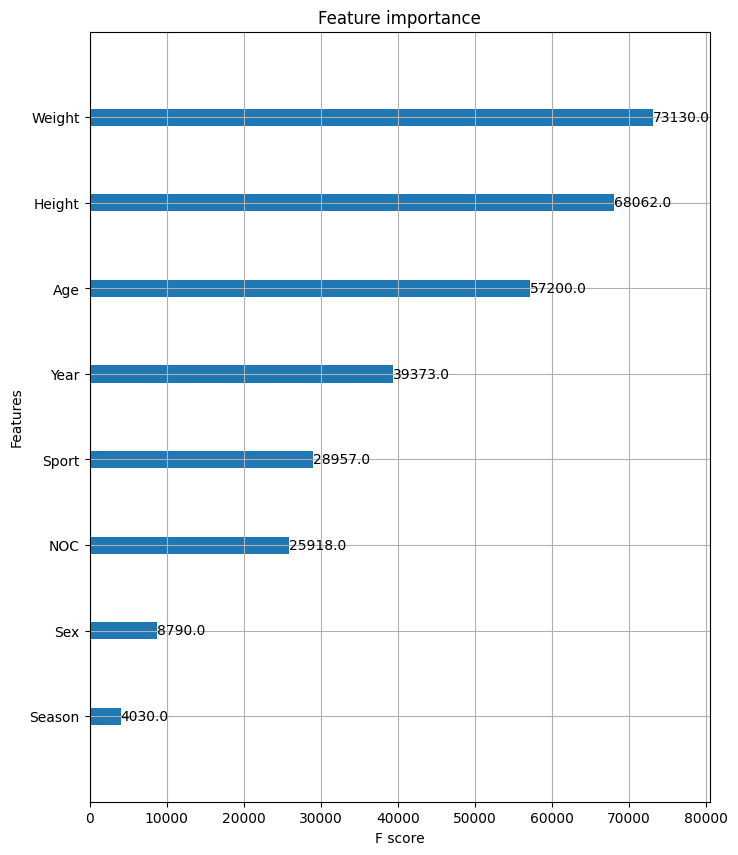

In [78]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 10))
plot_importance(model, ax=ax);

# Light GBM 모델


In [79]:
# 기본 lGBMRegressor 모델
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgb = LGBMClassifier(random_state=0)
lgb.fit(X_train, y_train)
pred = lgb.predict(X_test)

print('accuracy_score: {0:.5f}'.format(accuracy_score(y_test, pred)))

accuracy_score: 0.75309


In [80]:
#그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()

parameters = {'colsample_bytree': [0.7, 0.8],
              'learning_rate': [0.1, 0.15, 0.2],
              'max_depth': [11],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.3, 0.4]
              }

lgb_grid = GridSearchCV(lgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
lgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'learning_rate': [0.1, 0.15, 0.2], 'max_depth': [11],
                         'min_child_weight': [4], 'n_estimators': [1000],
                         'subsample': [0.3, 0.4]},
             scoring='r2', verbose=True)

In [81]:
print('GridSearchCV 최적 파라미터:', lgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.3}


In [82]:
from sklearn.metrics import accuracy_score

model = lgb_grid.best_estimator_
pred = model.predict(X_test)

print('accuracy_score: {0:.5f}'.format(accuracy_score(y_test, pred)))

accuracy_score: 0.74907


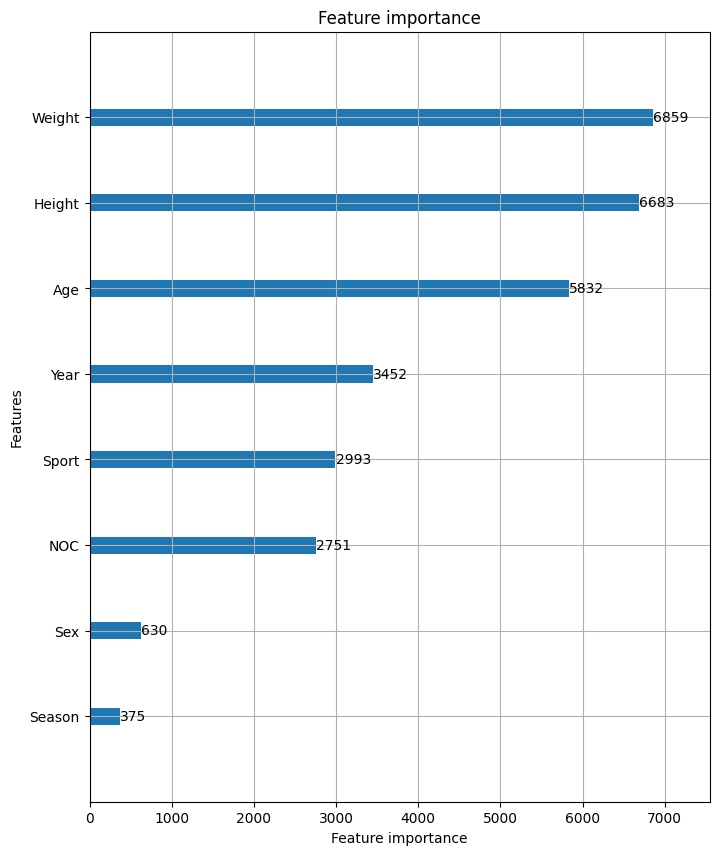

In [83]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 10))
plot_importance(model, ax=ax);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))